In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tqdm

import sys; sys.path.append("../../")
import maskflow

root_dir = Path("/home/hadim/.data/Neural_Network/Maskflow/Shapes")
data_dir = root_dir / "Data"
model_dir = root_dir / "Models"
model_dir.mkdir(exist_ok=True)

# Import the configuration associated with this dataset and network.
config = maskflow.config.load_config(root_dir / "config.yaml")

In [2]:
# Load training and test dataset
class_names = config["DATASET"]["CLASS_NAMES"]

train_file_path = data_dir / "train.tfrecords"
test_file_path = data_dir / "test.tfrecords"

train_dataset = maskflow.dataset.parse(train_file_path, config, do_preprocess=True)
test_dataset = maskflow.dataset.parse(test_file_path, config, do_preprocess=True)

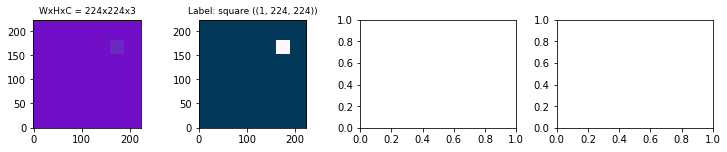

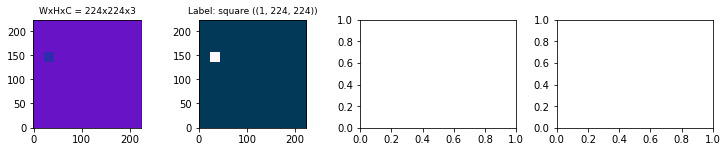

In [3]:
# Display
dataset_to_display = train_dataset.shuffle(1000).take(2)
maskflow.viz.batch_display_top_masks(dataset_to_display, class_names, basesize=10, limit=3, cmap="PuBu_r")

In [4]:
def _prepare_classification(datum):
    """Prepare a Maskflow dataset for classification."""
    return datum['image'], datum['label_ids'][0]

train_dataset = train_dataset.map(_prepare_classification)
test_dataset = test_dataset.map(_prepare_classification)

datum = [x for x in train_dataset.take(1)][0]

In [18]:
num_classes = 10
input_shape = (20, 224, 224, 3)

model = maskflow.model.ResNet200(num_classes=num_classes, include_top=True, data_format='channels_last')
model.build(input_shape=input_shape)

print(model.count_params())
assert model.count_params() == 21314122

output_shape = model.compute_output_shape(input_shape)
print(output_shape)
npt.assert_equal(output_shape, [20, 10])

62886026


AssertionError: 

In [15]:
import pytest

In [6]:
model = maskflow.model.ResNet(size=18, num_classes=10, include_top=True, data_format='channels_last')
model.build(input_shape=(None, None, None, 3))
model.summary()

Model: "ResNet_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block_group_1 (ConvNormReLuP multiple                  9728      
_________________________________________________________________
block_group_2 (BlockGroup)   multiple                  152896    
_________________________________________________________________
block_group_3 (BlockGroup)   multiple                  526720    
_________________________________________________________________
block_group_4 (BlockGroup)   multiple                  2102016   
_________________________________________________________________
block_group_5 (BlockGroup)   multiple                  8398336   
_________________________________________________________________
classify_block (ClassifyBloc multiple                  5130      
Total params: 11,194,826
Trainable params: 11,187,914
Non-trainable params: 6,912
_________________________________________

In [7]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0)
model.compile(optimizer=optimizer)

In [8]:
inputs = tf.expand_dims(datum[0], 0)
inputs = tf.cast(inputs, dtype="float32")
model(inputs)

<tf.Tensor: id=3160, shape=(1, 10), dtype=float32, numpy=
array([[1.0698109e-07, 2.2478285e-04, 7.4141932e-01, 1.1108668e-07,
        1.3228652e-06, 2.5640121e-01, 9.5079109e-08, 4.2409262e-08,
        4.6020398e-07, 1.9525377e-03]], dtype=float32)>

In [9]:
inputs = tf.expand_dims(datum[0], 0)
inputs = tf.cast(inputs, dtype="float32")
model.fit(inputs)

W0528 14:33:29.698842 140410941597504 training_utils.py:1109] Output output_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to output_1.
2019-05-28 14:33:29,698:WARNING:tensorflow: Output output_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to output_1.
2019-05-28 14:33:29,698:WARNING:tensorflow: Output output_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to output_1.


ValueError: The model cannot be compiled because it has no loss to optimize.